In [2]:
import torch
print(f"Version de PyTorch utilizada: {torch.__version__}")


Version de PyTorch utilizada: 2.6.0+cpu


In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)


2.6.0+cpu
0.21.0+cpu


In [3]:
from pathlib import Path

custom_image_path = Path("data/seg_pred/seg_pred/3.jpg")
custom_image_path

WindowsPath('data/seg_pred/seg_pred/3.jpg')

In [11]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)


AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

In [9]:
import torchvision

target_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

AttributeError: '_OpNamespace' 'image' object has no attribute 'read_file'

In [7]:
import torchvision
torchvision.__version__

'0.19.1+cpu'

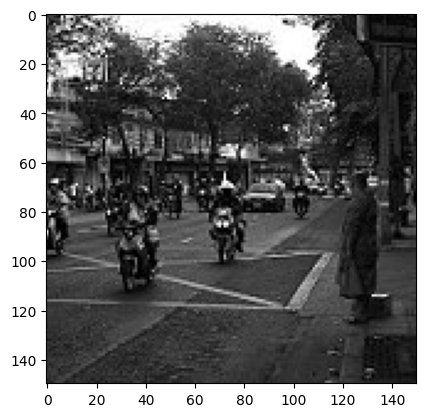

In [5]:
import matplotlib.pyplot as plt
plt.imshow(custom_image_unit8.permute(1, 2, 0))

In [6]:
image_path_glob = Path("data/seg_test")
image_path_glob

WindowsPath('data/seg_test')

In [7]:
from PIL import Image

image_path_list = list(image_path_glob.glob("*/*/*.jpg")) #obtain all the images paths in the folder
print(f" number of images inside the testFolder: {len(image_path_list)}")

 number of images inside the testFolder: 3000


data\seg_test\seg_test\street\24097.jpg
street
Random image path: data\seg_test\seg_test\street\24097.jpg
image class: street
image heigth: 150
image width: 150


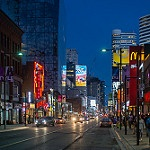

In [8]:
#Get the label of the image
import random 
random_number_path = random.choice(image_path_list)
print(random_number_path)

image_class = random_number_path.parent.stem #parent is all the other directorys and stem is the last one that is the class
print(image_class)

img = Image.open(random_number_path)
# print metadata
print(f"Random image path: {random_number_path}")
print(f"image class: {image_class}")
print(f"image heigth: {img.height}")
print(f"image width: {img.width}")
img

In [9]:
train_dir = Path('data/seg_train/seg_train')
test_dir = Path('data/seg_test/seg_test')
train_dir, test_dir

(WindowsPath('data/seg_train/seg_train'),
 WindowsPath('data/seg_test/seg_test'))

In [10]:
import model_builder
import data_setup
import argparse
from torchvision import transforms
from pathlib import Path

# Configurar argumentos
parser = argparse.ArgumentParser()
parser.add_argument('--train_dir', type=str, default='data/seg_train/seg_train')
parser.add_argument('--test_dir', type=str, default='data/seg_test/seg_test')
parser.add_argument('--batch_size', type=int, default=32)

# Evitar error en Jupyter
args = parser.parse_args(args=[])

# Transformaciones (cambiar nombre para evitar sobrescribir 'transforms')
data_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# Convertir rutas a string si se usa Path
train_dir = str(args.train_dir)
test_dir = str(args.test_dir)

# Crear DataLoaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transforms,
    batch_size=args.batch_size
)

print(f"Clases detectadas: {class_names}")
print(f"Imágenes en train: {len(train_dataloader.dataset)}")
print(f"Imágenes en test: {len(test_dataloader.dataset)}")


Clases detectadas: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Imágenes en train: 14034
Imágenes en test: 3000


In [11]:
help(data_setup) #useful to see the documentation of the function

Help on module data_setup:

NAME
    data_setup

FUNCTIONS
    create_dataloaders(train_dir: str, test_dir: str, transform: torchvision.transforms.transforms.Compose, batch_size: int)
        Creates training and testing DataLoaders.

        Takes in a training directory and testing directory path and turns
        them into PyTorch Datasets and then into PyTorch DataLoaders.

        Args:
          train_dir: Path to training directory.
          test_dir: Path to testing directory.
          transform: torchvision transforms to perform on training and testing data.
          batch_size: Number of samples per batch in each of the DataLoaders.
          num_workers: An integer for number of workers per DataLoader.

        Returns:
          A tuple of (train_dataloader, test_dataloader, class_names).
          Where class_names is a list of the target classes.
          Example usage:
            train_dataloader, test_dataloader, class_names =         = create_dataloaders(train_dir

In [12]:
# check the dataloader
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [13]:
#instanciate the model
model = model_builder.CNN(input_shape=3, hidden_units=16, output_shape=len(class_names))
model

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=6, bias=True)
  )
)

In [14]:
#prove our model hyperparameters works well

random_tesor = torch.rand(size=(1,3,64,64))
random_tesor.shape


y_pred = model(random_tesor)
y_pred

tensor([[ 0.1588, -0.1763, -0.1011, -0.2186,  0.1261,  0.1798]],
       grad_fn=<AddmmBackward0>)

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
import engine 

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

train_loss, train_acc = engine.train_step(model=model, train_dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train_loss, train_acc

(3.507909816055472, 0.17188686408504175)

In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if your GPU is detected

False


In [3]:
import os
from pathlib import Path
data_path = Path("archive.zip") 
os.remove(data_path)